## Libraries imports

In [ ]:
# =======================
# 📊 Data Handling
# =======================
import numpy as np
import pandas as pd

# =======================
# 📈 Data Visualization
# =======================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# =======================
# 🤖 Machine Learning (scikit-learn)
# =======================
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.base import BaseEstimator, RegressorMixin

# =======================
# 📊 Statistical Analysis (statsmodels)
# =======================
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# =======================
# 🧠 Deep Learning (PyTorch)
# =======================
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# =======================
# ⏱️ Utility
# =======================
import time


## Data Pre-processing

In [ ]:
#loading dataset
df = pd.read_excel("AirQualityUCI.xlsx")

df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
#Initial description of dataset
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

(9357, 15)

In [ ]:
# this dataset has missing values labelled with -200 so we have to find the number of missing values and remove them later
columns = {"Date", "Time", "CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)", "NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"}

def findNumOfMissingVals(col):
    allValues = []
    for column in col:
        val = 0
        for i in df[column]:
            if i == -200:
                val += 1
        allValues.append(val)
    return allValues
values = findNumOfMissingVals(["CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)", "NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"])
valuesMapped = dict(zip(sorted(columns), values))
valuesMapped

{'AH': 1683,
 'C6H6(GT)': 366,
 'CO(GT)': 8443,
 'Date': 366,
 'NMHC(GT)': 366,
 'NO2(GT)': 1639,
 'NOx(GT)': 366,
 'PT08.S1(CO)': 1642,
 'PT08.S2(NMHC)': 366,
 'PT08.S3(NOx)': 366,
 'PT08.S4(NO2)': 366,
 'PT08.S5(O3)': 366,
 'RH': 366}

In [ ]:
# from the above result we can see that the column NMHC(GT) alone has around 8443 missing values while other columns have less values
#so we are dropping the column to prevent too much error
df.drop('NMHC(GT)', axis=1, inplace=True)
df.drop('Date', axis=1, inplace=True)
df.drop('Time', axis=1, inplace=True)

# Replace -200 with null values.
def replaceValues(value1, value2, df):
    df = df.replace(value1, value2)
    return df

df2 = df.copy()      #copying the original dataframe to new dataframe

df2 = replaceValues(-200, np.nan, df2)      #replacing the missing values labeled with -200

# go through rows and drop rows w/ 1 or more NaN values.
def dropMissingRows(df):
    df = df.dropna(axis=0)
    return df

df2 = dropMissingRows(df2)


# checking new data
df2.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
df2.shape

(6941, 12)

In [ ]:
# Applying log transformation to skewed variables
skewed_columns = ['NOx(GT)', 'C6H6(GT)', 'PT08.S3(NOx)', 'PT08.S5(O3)']

# Find the minimum values
min_values = df[skewed_columns].min()

# If any column has negative values, shift them
for col in skewed_columns:
    if min_values[col] <= 0:
        df[col] = df[col] + abs(min_values[col]) + 1  # Shift to make all values positive

# Apply log transformation
df[skewed_columns] = df[skewed_columns].apply(lambda x: np.log1p(x))

# Checking new data
df.head()
df.shape

(9357, 12)

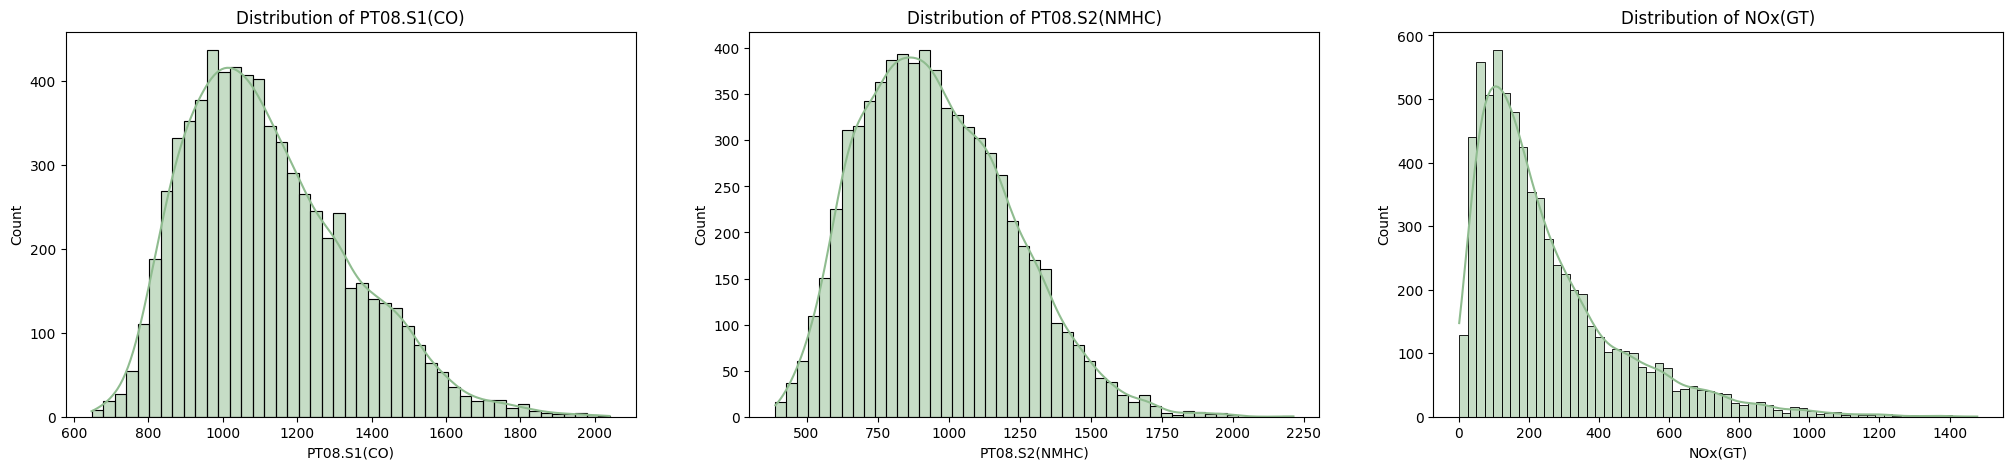

In [ ]:
# more data exploration through visualizing
#plotting histograms of each category to idenitfy patterns in the data

def showDistributions(category1, category2, category3):
    fig, axes = plt.subplots(1,3, figsize=(25, 5))
    sns.histplot(data=df2, x=category1, kde=True, color="darkseagreen", ax=axes[0])
    axes[0].set_title("Distribution of {}".format(category1))
    sns.histplot(data=df2, x=category2, kde=True, color="darkseagreen", ax=axes[1])
    axes[1].set_title("Distribution of {}".format(category2))
    sns.histplot(data=df2, x=category3, kde=True, color="darkseagreen", ax=axes[2])
    axes[2].set_title("Distribution of {}".format(category3))

showDistributions("PT08.S1(CO)", "PT08.S2(NMHC)", "NOx(GT)")


In [ ]:
# data visualization functions

def visualizeScatter(df, x, y, fill, title):
    fig = px.scatter(df,
    x=x,
    y=y,
    color=fill,
    title=title)

    fig.show()

def displayHeatMap(dim1, dim2, title, df):
    fig=plt.figure(figsize=(dim1,dim2))
    plt.title(title)
    sns.heatmap(df, annot= True, cmap='flare')

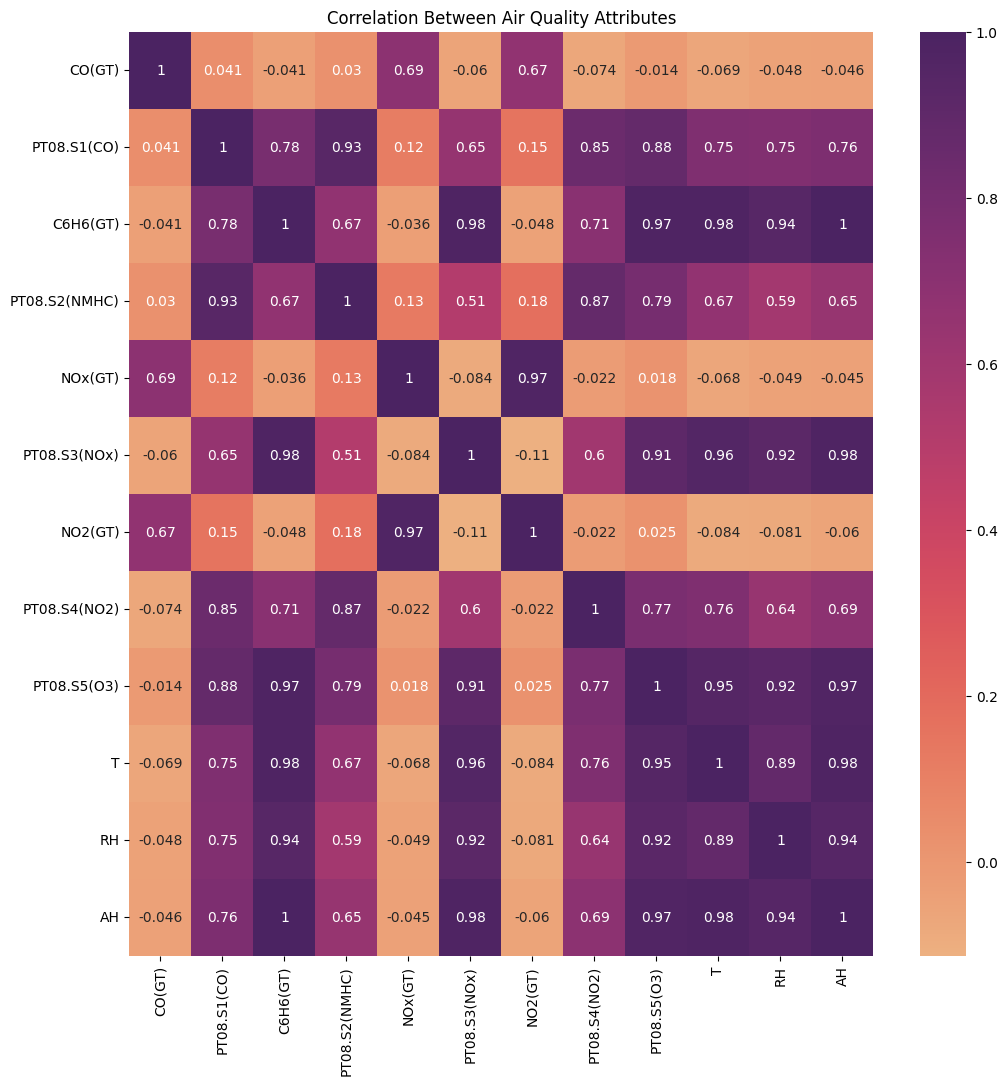

In [ ]:
# Correlations between attributes
corr = df.corr()
displayHeatMap(12, 12, 'Correlation Between Air Quality Attributes', corr)

In [ ]:
# change in concentrations over temp, relative humidity, absolute humidity

visualizeScatter(df2, 'RH', 'T', 'RH', 'Concentrations over Temperature and Relative Humidity')

In [ ]:
visualizeScatter(df2, 'AH', 'T', 'AH', 'Concentrations over Temperature and Absolute Humidity')

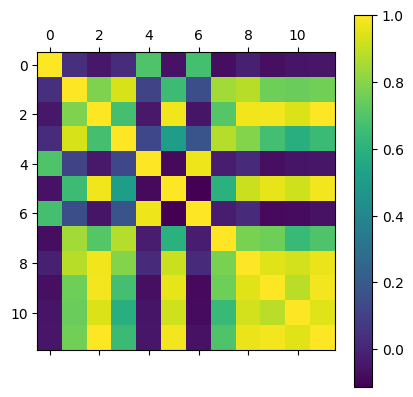

In [ ]:
plt.matshow(df.corr())
plt.colorbar()
plt.show()

In [ ]:
df.corr()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.041415,-0.041412,0.029939,0.692795,-0.059615,0.671140,-0.073721,-0.013896,-0.068952,-0.048231,-0.045892
PT08.S1(CO),0.041415,1.000000,0.784802,0.933101,0.117435,0.649556,0.154058,0.845133,0.881542,0.754806,0.745344,0.764866
C6H6(GT),-0.041412,0.784802,1.000000,0.672733,-0.036101,0.975606,-0.047999,0.707593,0.974802,0.980557,0.942014,0.999319
PT08.S2(NMHC),0.029939,0.933101,0.672733,1.000000,0.127461,0.511871,0.176569,0.874761,0.791803,0.668984,0.585775,0.646535
NOx(GT),0.692795,0.117435,-0.036101,0.127461,1.000000,-0.083815,0.972593,-0.022219,0.017926,-0.067983,-0.048523,-0.045221
PT08.S3(NOx),-0.059615,0.649556,0.975606,0.511871,-0.083815,1.000000,-0.112958,0.597378,0.909119,0.957547,0.921248,0.981476
NO2(GT),0.671140,0.154058,-0.047999,0.176569,0.972593,-0.112958,1.000000,-0.022092,0.025321,-0.084084,-0.081300,-0.060423
PT08.S4(NO2),-0.073721,0.845133,0.707593,0.874761,-0.022219,0.597378,-0.022092,1.000000,0.774210,0.755053,0.640685,0.691889
PT08.S5(O3),-0.013896,0.881542,0.974802,0.791803,0.017926,0.909119,0.025321,0.774210,1.000000,0.947983,0.923911,0.967852
T,-0.068952,0.754806,0.980557,0.668984,-0.067983,0.957547,-0.084084,0.755053,0.947983,1.000000,0.885910,0.980998


In [ ]:
target_columns = ['NOx(GT)', 'AH', 'C6H6(GT)']
X = df.drop(target_columns, axis=1)
y = df[target_columns]

# 1. Linear Regression Model:

Linear regression is a straightforward approach that models the relationship between target features concentrations and other air quality parameters as a linear combination. This approach offers high interpretability, allowing us to identify which pollutants have the strongest influence on these gas levels.

The implementation below includes:
1. Feature selection using Variance Inflation Factor (VIF) to address multicollinearity
2. Data preprocessing with train/test splitting and feature scaling
3. Model training and coefficient analysis
4. Comprehensive evaluation using multiple metrics and residual analysis

Let's implement the linear regression model with multiple output and evaluate its performance:

In [ ]:
# Check for multicollinearity using VIF
print("\nVariance Inflation Factor (VIF):")
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data.sort_values("VIF", ascending=False))



Variance Inflation Factor (VIF):
         feature          VIF
6    PT08.S5(O3)  1441.154041
3   PT08.S3(NOx)   810.610182
1    PT08.S1(CO)   188.321141
2  PT08.S2(NMHC)   156.094959
5   PT08.S4(NO2)    57.387960
8             RH    11.628886
7              T     6.898365
4        NO2(GT)     2.687075
0         CO(GT)     2.240182


In [ ]:
# Based on VIF, we want to exclude highly collinear features
high_vif_features = vif_data[vif_data["VIF"] > 190]["feature"].tolist()
print(f"\nExcluding high VIF features: {high_vif_features}")
X_reduced = X.drop(high_vif_features, axis=1)
print(X_reduced)


Excluding high VIF features: ['PT08.S3(NOx)', 'PT08.S5(O3)']
      CO(GT)  PT08.S1(CO)  PT08.S2(NMHC)  NO2(GT)  PT08.S4(NO2)       T  \
0        2.6      1360.00        1045.50    113.0       1692.00  13.600   
1        2.0      1292.25         954.75     92.0       1558.75  13.300   
2        2.2      1402.00         939.25    114.0       1554.50  11.900   
3        2.2      1375.50         948.25    122.0       1583.75  11.000   
4        1.6      1272.25         835.50    116.0       1490.00  11.150   
...      ...          ...            ...      ...           ...     ...   
9352     3.1      1314.25        1101.25    189.8       1374.25  21.850   
9353     2.4      1162.50        1027.00    179.2       1263.50  24.325   
9354     2.4      1142.00        1062.50    174.7       1240.75  26.900   
9355     2.1      1002.50         960.50    155.7       1041.00  28.325   
9356     2.2      1070.75        1047.25    167.7       1128.50  28.500   

             RH  
0     48.875001  
1

In [ ]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Training set: (7485, 7)
Testing set: (1872, 7)


In [ ]:
multi_target_model = MultiOutputRegressor(LinearRegression())
multi_target_model.fit(X_train_scaled, y_train)


MultiOutputRegressor(estimator=LinearRegression())

In [ ]:
# Display model coefficients for each target
print("\nModel Coefficients:")
target_names = y.columns
for i, target in enumerate(target_names):
    print(f"\nCoefficients for {target}:")
    coef_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Coefficient': multi_target_model.estimators_[i].coef_
    })
    print(coef_df.sort_values('Coefficient', ascending=False))



Model Coefficients:

Coefficients for NOx(GT):
         Feature  Coefficient
3        NO2(GT)     2.054655
4   PT08.S4(NO2)     0.367582
6             RH     0.323315
0         CO(GT)     0.103748
5              T    -0.139556
2  PT08.S2(NMHC)    -0.230821
1    PT08.S1(CO)    -0.306380

Coefficients for AH:
         Feature  Coefficient
5              T    29.815812
6             RH    12.154065
2  PT08.S2(NMHC)     2.967221
1    PT08.S1(CO)     1.617763
3        NO2(GT)     0.154634
0         CO(GT)     0.049213
4   PT08.S4(NO2)    -7.231274

Coefficients for C6H6(GT):
         Feature  Coefficient
5              T     0.671477
6             RH     0.274730
2  PT08.S2(NMHC)     0.116335
1    PT08.S1(CO)     0.040174
3        NO2(GT)     0.003285
0         CO(GT)     0.001389
4   PT08.S4(NO2)    -0.177128


In [ ]:
# Model Evaluation
# Make predictions
y_train_pred = multi_target_model.predict(X_train_scaled)
y_test_pred = multi_target_model.predict(X_test_scaled)

# Calculate overall metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nOverall Model Metrics:")
print(f"Training set metrics:")
print(f"  MSE: {train_mse:.4f}")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  MAE: {train_mae:.4f}")
print(f"  R²: {train_r2:.4f}")

print(f"\nTest set metrics:")
print(f"  MSE: {test_mse:.4f}")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  MAE: {test_mae:.4f}")
print(f"  R²: {test_r2:.4f}")



Overall Model Metrics:
Training set metrics:
  MSE: 2.5085
  RMSE: 1.5838
  MAE: 0.8789
  R²: 0.9838

Test set metrics:
  MSE: 2.5105
  RMSE: 1.5845
  MAE: 0.8782
  R²: 0.9837


In [ ]:
# Calculate metrics for each target
print("\nMetrics for individual targets:")
for i, target in enumerate(target_names):
    y_train_target = y_train.iloc[:, i]
    y_test_target = y_test.iloc[:, i]
    y_train_pred_target = y_train_pred[:, i]
    y_test_pred_target = y_test_pred[:, i]

    train_mse_target = mean_squared_error(y_train_target, y_train_pred_target)
    test_mse_target = mean_squared_error(y_test_target, y_test_pred_target)
    train_rmse_target = np.sqrt(train_mse_target)
    test_rmse_target = np.sqrt(test_mse_target)
    train_r2_target = r2_score(y_train_target, y_train_pred_target)
    test_r2_target = r2_score(y_test_target, y_test_pred_target)

    print(f"\n{target} metrics:")
    print(f"  Training R²: {train_r2_target:.4f}")
    print(f"  Test R²: {test_r2_target:.4f}")
    print(f"  Training RMSE: {train_rmse_target:.4f}")
    print(f"  Test RMSE: {test_rmse_target:.4f}")

    # Most important features for each target
    print(f"  Most important features for {target}:")
    coef_abs = pd.DataFrame({
        'Feature': X_train.columns,
        'Coefficient': multi_target_model.estimators_[i].coef_,
        'Absolute Coefficient': np.abs(multi_target_model.estimators_[i].coef_)
    })

    for _, row in coef_abs.sort_values('Absolute Coefficient', ascending=False).head(3).iterrows():
        print(f"    {row['Feature']}: {row['Coefficient']:.4f}")


Metrics for individual targets:

NOx(GT) metrics:
  Training R²: 0.9616
  Test R²: 0.9617
  Training RMSE: 0.4051
  Test RMSE: 0.3931
  Most important features for NOx(GT):
    NO2(GT): 2.0547
    PT08.S4(NO2): 0.3676
    RH: 0.3233

AH metrics:
  Training R²: 0.9952
  Test R²: 0.9951
  Training RMSE: 2.7123
  Test RMSE: 2.7152
  Most important features for AH:
    T: 29.8158
    RH: 12.1541
    PT08.S4(NO2): -7.2313

C6H6(GT) metrics:
  Training R²: 0.9945
  Test R²: 0.9944
  Training RMSE: 0.0671
  Test RMSE: 0.0674
  Most important features for C6H6(GT):
    T: 0.6715
    RH: 0.2747
    PT08.S4(NO2): -0.1771


## observation

In [ ]:
print("\nConclusion:")
print(f"The multi-target regression model achieved an overall R² of {test_r2:.4f} on the test set.")
print(f"The model's overall RMSE on the test set is {test_rmse:.4f}.")
print("Individual target performance varies, with detailed metrics above.")


Conclusion:
The multi-target regression model achieved an overall R² of 0.9837 on the test set.
The model's overall RMSE on the test set is 1.5845.
Individual target performance varies, with detailed metrics above.


 # 2. KNN Regression Model :

K-Nearest Neighbors (KNN) regression is a non-parametric method that predicts based on the average of the k nearest data points. Unlike linear regression, KNN can capture non-linear relationships between variables without explicitly modeling them.

This implementation focuses on:
1. Feature selection using correlation analysis and statistical tests
2. Hyperparameter tuning to find the optimal number of neighbors and distance metrics
3. Model evaluation on both training and test sets
4. Visual analysis of model performance and residuals

KNN may potentially capture complex interactions between pollutants that affect NOx levels:

In [ ]:
def evaluate_model(y_true, y_pred, model_name="KNN Model"):
    # Overall metrics
    overall_mse = mean_squared_error(y_true.values.flatten(), y_pred.flatten())
    overall_rmse = np.sqrt(overall_mse)
    overall_mae = mean_absolute_error(y_true.values.flatten(), y_pred.flatten())
    overall_r2 = r2_score(y_true.values.flatten(), y_pred.flatten())

    print(f"\n{model_name} - Overall Performance:")
    print(f"  MSE: {overall_mse:.4f}")
    print(f"  RMSE: {overall_rmse:.4f}")
    print(f"  MAE: {overall_mae:.4f}")
    print(f"  R²: {overall_r2:.4f}")

    # Per-target metrics
    print("\nMetrics for Each Target:")
    r2_scores = []

    for i, target in enumerate(y_true.columns):
        target_true = y_true[target]
        target_pred = y_pred[:, i]

        mse = mean_squared_error(target_true, target_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(target_true, target_pred)
        r2 = r2_score(target_true, target_pred)
        r2_scores.append(r2)

        print(f"\n{target}:")
        print(f"  MSE: {mse:.4f}")
        print(f"  RMSE: {rmse:.4f}")
        print(f"  MAE: {mae:.4f}")
        print(f"  R²: {r2:.4f}")

        # Plot actual vs predicted
        plt.figure(figsize=(8, 6))
        plt.scatter(target_true, target_pred, alpha=0.5)
        plt.plot([min(target_true), max(target_true)], [min(target_true), max(target_true)], 'r--')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'{model_name} - Actual vs Predicted: {target} (R² = {r2:.4f})')
        plt.grid(True)
        plt.show()

    # Average R² across all targets
    avg_r2 = np.mean(r2_scores)
    print(f"\nAverage R² across all targets: {avg_r2:.4f}")

    return overall_r2, r2_scores



In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

Training set: (7485, 9)
Testing set: (1872, 9)


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Find optimal k using grid search
print("Finding optimal k using cross-validation...")
param_grid = {'n_neighbors': np.arange(3, 21, 2)}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train[target_columns[0]])  # Use first target for optimization
best_k = grid_search.best_params_['n_neighbors']
print(f"Optimal k value: {best_k}")


Finding optimal k using cross-validation...
Optimal k value: 3


In [ ]:
# Train KNN with MultiOutputRegressor using the optimal k
start_time = time.time()
multi_knn = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=best_k, weights='distance'))
multi_knn.fit(X_train_scaled, y_train)
training_time = time.time() - start_time
print(f"Model trained in {training_time:.2f} seconds")


Model trained in 0.03 seconds


In [ ]:
# Make predictions
y_train_pred_multi = multi_knn.predict(X_train_scaled)
y_test_pred_multi = multi_knn.predict(X_test_scaled)

# Convert predictions to DataFrames for easier handling
y_train_pred_multi_df = pd.DataFrame(y_train_pred_multi, columns=target_columns)
y_test_pred_multi_df = pd.DataFrame(y_test_pred_multi, columns=target_columns)



Training set evaluation:

KNN (Multi) - Training - Overall Performance:
  MSE: 0.0000
  RMSE: 0.0042
  MAE: 0.0001
  R²: 1.0000

Metrics for Each Target:

NOx(GT):
  MSE: 0.0001
  RMSE: 0.0072
  MAE: 0.0002
  R²: 1.0000


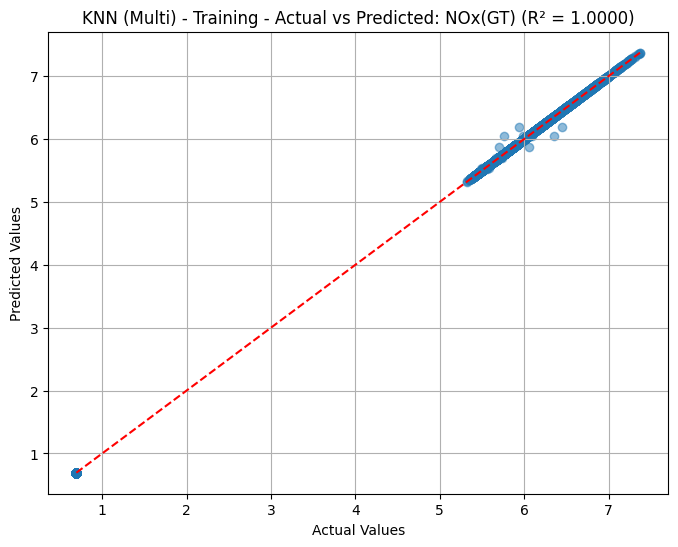


AH:
  MSE: 0.0000
  RMSE: 0.0000
  MAE: 0.0000
  R²: 1.0000


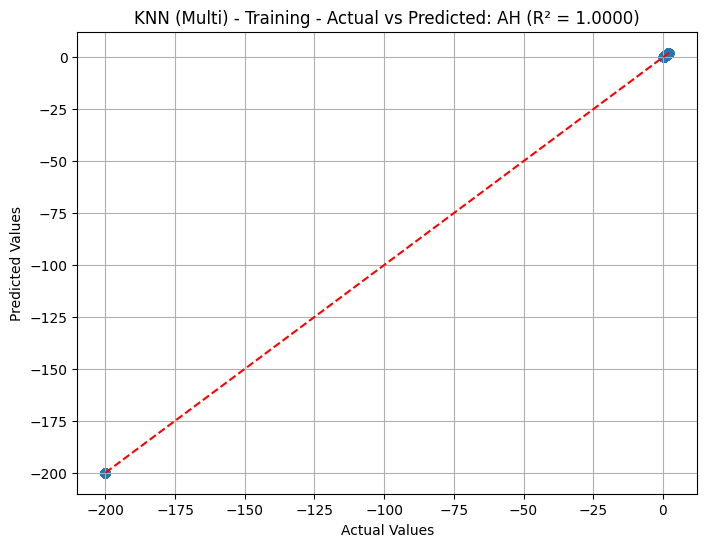


C6H6(GT):
  MSE: 0.0000
  RMSE: 0.0000
  MAE: 0.0000
  R²: 1.0000


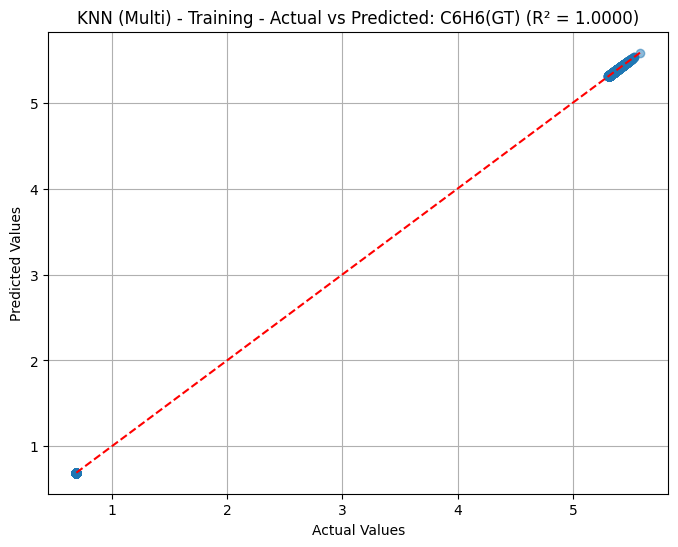


Average R² across all targets: 1.0000

Test set evaluation:

KNN (Multi) - Test - Overall Performance:
  MSE: 0.0114
  RMSE: 0.1068
  MAE: 0.0431
  R²: 1.0000

Metrics for Each Target:

NOx(GT):
  MSE: 0.0242
  RMSE: 0.1554
  MAE: 0.0606
  R²: 0.9940


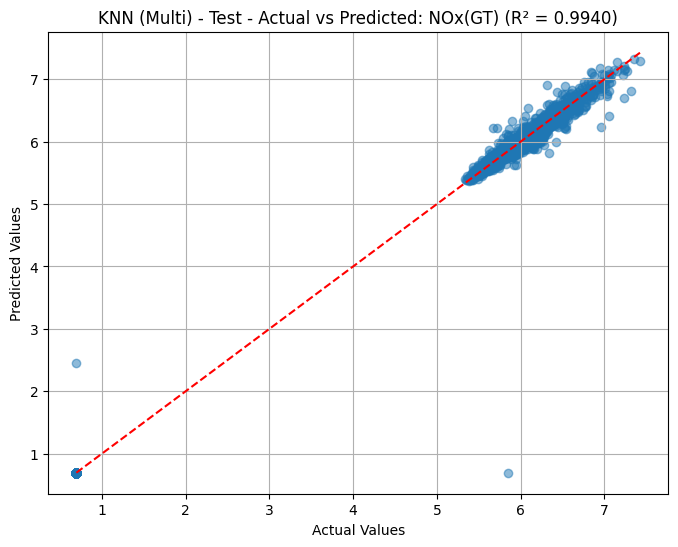


AH:
  MSE: 0.0101
  RMSE: 0.1003
  MAE: 0.0667
  R²: 1.0000


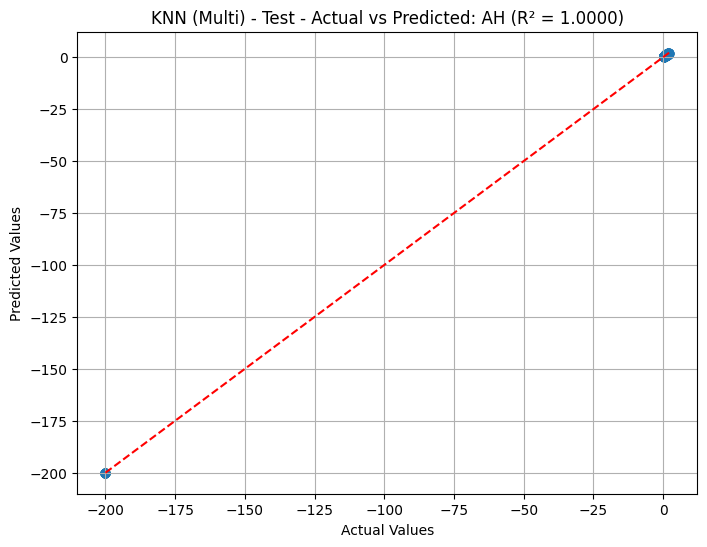


C6H6(GT):
  MSE: 0.0000
  RMSE: 0.0028
  MAE: 0.0019
  R²: 1.0000


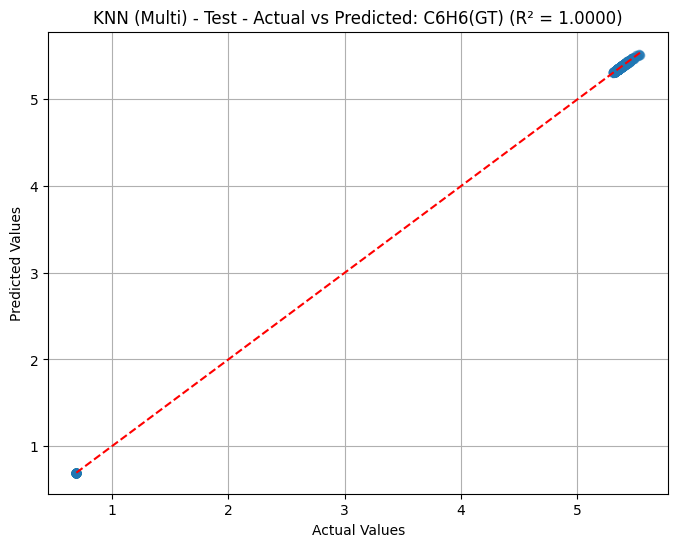


Average R² across all targets: 0.9980


In [ ]:
# Evaluate the model
print("\nTraining set evaluation:")
train_r2, train_target_r2 = evaluate_model(y_train, y_train_pred_multi, "KNN (Multi) - Training")

print("\nTest set evaluation:")
test_r2, test_target_r2 = evaluate_model(y_test, y_test_pred_multi, "KNN (Multi) - Test")


In [ ]:
# Conclusion
print(f"The KNN regression model achieved an R² of {test_r2:.4f} on the test set.")
print(f"The model's RMSE on the test set is {test_rmse:.4f}.")
print(f"Best hyperparameters: {grid_search.best_params_}")

The KNN regression model achieved an R² of 1.0000 on the test set.
The model's RMSE on the test set is 1.5845.
Best hyperparameters: {'n_neighbors': np.int64(3)}


# 3. Neural Network Regression Model:
---
Neural Networks provide powerful non-linear modeling capabilities through multiple interconnected layers of neurons, making them well-suited for capturing complex relationships in emissions data.
This implementation focuses on:

* Multi-layer architecture with dropout regularization to prevent overfitting
* Comprehensive hyperparameter tuning for neurons, dropout rates, and learning rates
* Early stopping to optimize training duration and model performance
* Detailed visualization of training progress and model performance

The neural network approach can potentially identify subtle patterns in the data by:

* Learning hierarchical representations of emission factors
* Capturing complex interactions between operating conditions and NOx production
* Adapting to nonlinear relationships between input variables and target emissions
* Generalizing well to unseen data when properly regularized

This model extends beyond traditional regression techniques by leveraging deep learning capabilities to model the intricate processes underlying NOx formation in combustion systems.


In [ ]:
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

# Scale the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale the targets (optional but can help with training)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

Training set: (7485, 9)
Testing set: (1872, 9)


In [ ]:
# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test_scaled)

In [ ]:
# Define the neural network architecture
class MultiTargetANN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim, dropout_rate=0.2):
        super(MultiTargetANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.bn1 = nn.BatchNorm1d(hidden_dim1)
        self.dropout1 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.bn2 = nn.BatchNorm1d(hidden_dim2)
        self.dropout2 = nn.Dropout(dropout_rate)

        self.output_layer = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)

        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)

        x = self.output_layer(x)
        return x

In [ ]:
# Set up model hyperparameters
input_dim = X_train_scaled.shape[1]
hidden_dim1 = 32
hidden_dim2 = 16
output_dim = len(target_columns)
learning_rate = 0.001
num_epochs = 200
batch_size = 32
early_stopping_patience = 18

In [ ]:
# Initialize the model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

model = MultiTargetANN(input_dim, hidden_dim1, hidden_dim2, output_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10, factor=0.5, verbose=True)

Using device: cpu


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning:

The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.



In [ ]:
# Function to create batches manually
def get_batches(X, y, batch_size):
    num_samples = len(X)
    indices = np.arange(num_samples)
    np.random.shuffle(indices)

    for start_idx in range(0, num_samples, batch_size):
        end_idx = min(start_idx + batch_size, num_samples)
        batch_indices = indices[start_idx:end_idx]
        yield X[batch_indices], y[batch_indices]

In [ ]:
# Define function to evaluate model
def evaluate_model(model, X, y, criterion, device):
    model.eval()

    X, y = X.to(device), y.to(device)
    with torch.no_grad():
        outputs = model(X)
        loss = criterion(outputs, y)

    return loss.item(), outputs.cpu().numpy(), y.cpu().numpy()

In [ ]:
# Training loop with early stopping
train_losses = []
val_losses = []
best_val_loss = float('inf')
patience_counter = 0

X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    # Manual batch creation and training
    for X_batch, y_batch in get_batches(X_train_tensor, y_train_tensor, batch_size):
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * len(X_batch)

    # Calculate average loss for the epoch
    epoch_train_loss = running_loss / len(X_train_tensor)
    train_losses.append(epoch_train_loss)

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor).item()

    val_losses.append(val_loss)

    # Update learning rate scheduler
    scheduler.step(val_loss)

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        # Save the best model
        torch.save(model.state_dict(), 'best_pollution_model.pth')
    else:
        patience_counter += 1

    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {val_loss:.4f}')

    if patience_counter >= early_stopping_patience:
        print(f'Early stopping triggered after {epoch+1} epochs')
        break

Epoch [10/200], Train Loss: 0.1505, Val Loss: 0.0190
Epoch [20/200], Train Loss: 0.1056, Val Loss: 0.0516
Epoch [30/200], Train Loss: 0.0948, Val Loss: 0.1016
Early stopping triggered after 30 epochs


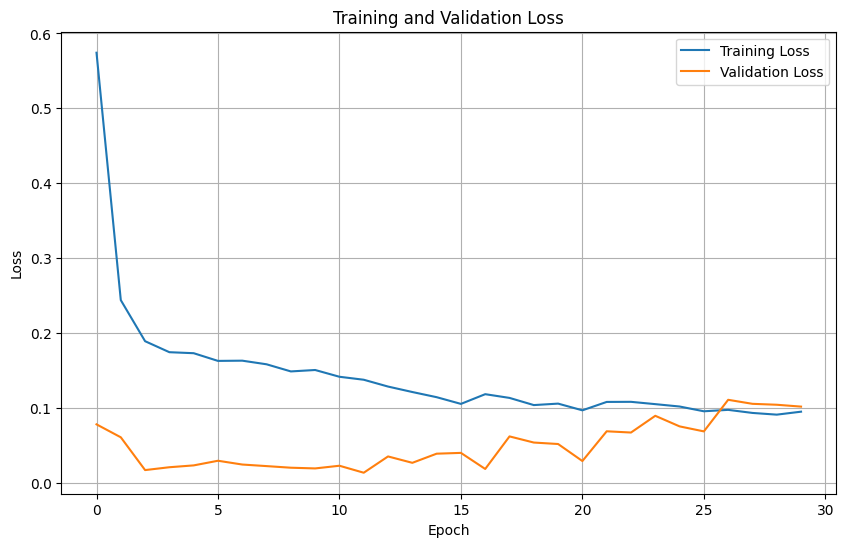

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Generate predictions for the test set
model.eval()
with torch.no_grad():
    test_preds_scaled = model(X_test_tensor).cpu().numpy()
    test_targets_scaled = y_test_tensor.cpu().numpy()

# Inverse transform the predictions and targets
test_predictions = scaler_y.inverse_transform(test_preds_scaled)
test_targets_actual = scaler_y.inverse_transform(test_targets_scaled)



Test Results for Each Target:

NOx(GT):
  MSE: 0.0890
  RMSE: 0.2984
  MAE: 0.2031
  R²: 0.9779


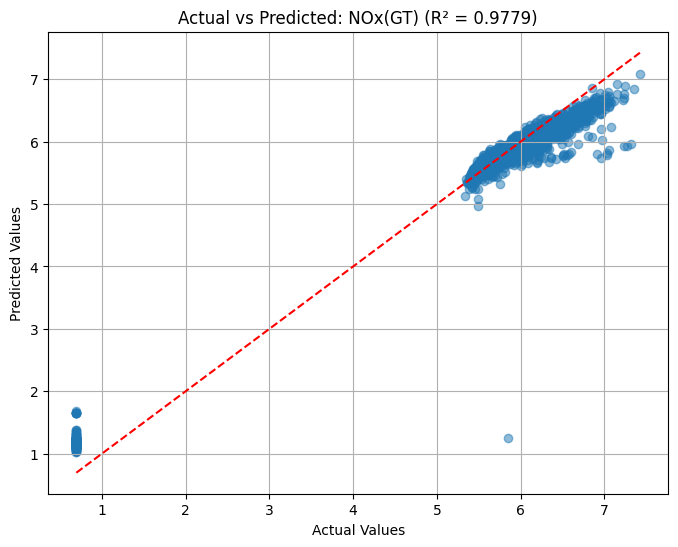


AH:
  MSE: 215.3916
  RMSE: 14.6762
  MAE: 3.7931
  R²: 0.8559


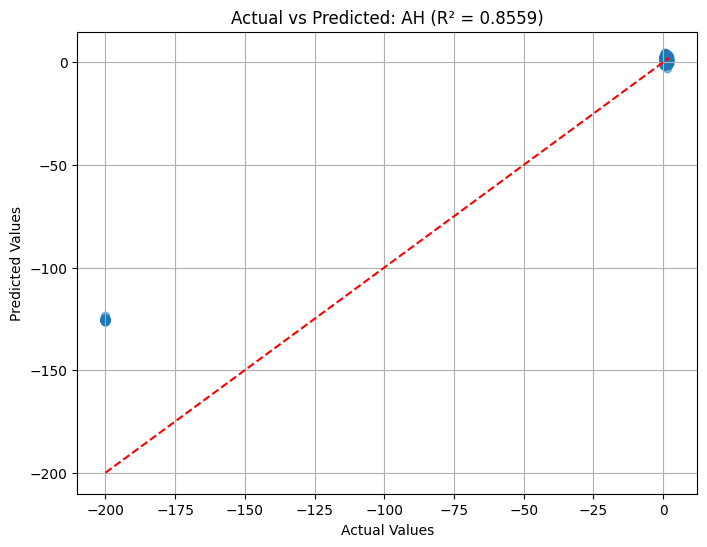


C6H6(GT):
  MSE: 0.1173
  RMSE: 0.3425
  MAE: 0.0945
  R²: 0.8544


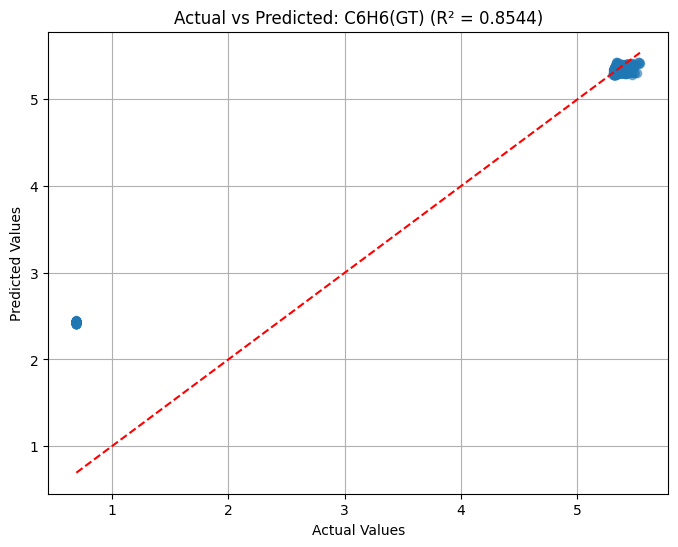

In [ ]:
# Calculate metrics for each target
print("\nTest Results for Each Target:")
overall_r2 = []

for i, target in enumerate(target_columns):
    target_preds = test_predictions[:, i]
    target_actual = test_targets_actual[:, i]

    # Calculate metrics
    mse = mean_squared_error(target_actual, target_preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(target_actual, target_preds)
    r2 = r2_score(target_actual, target_preds)
    overall_r2.append(r2)

    print(f"\n{target}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R²: {r2:.4f}")

    # Plot actual vs predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(target_actual, target_preds, alpha=0.5)
    plt.plot([min(target_actual), max(target_actual)], [min(target_actual), max(target_actual)], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted: {target} (R² = {r2:.4f})')
    plt.grid(True)
    plt.show()

In [ ]:
#Calculate overall model metrics
overall_mse = mean_squared_error(test_targets_actual.flatten(), test_predictions.flatten())
overall_rmse = np.sqrt(overall_mse)
overall_mae = mean_absolute_error(test_targets_actual.flatten(), test_predictions.flatten())
overall_r2 = r2_score(test_targets_actual.flatten(), test_predictions.flatten())

print("\nOverall Model Performance:")
print(f"  MSE: {overall_mse:.4f}")
print(f"  RMSE: {overall_rmse:.4f}")
print(f"  MAE: {overall_mae:.4f}")
print(f"  R²: {overall_r2:.4f}")


Overall Model Performance:
  MSE: 71.8660
  RMSE: 8.4774
  MAE: 1.3635
  R²: 0.8647


# 4. Decision Tree & Random Forest

## 4.1. Decision Tree Regression Model:
Decision Tree Regression is a non-parametric method that predicts values by learning simple decision rules inferred from data features. The model recursively splits the dataset into subsets based on the feature that provides the most information gain at each step.
This implementation focuses on:

1. Creating a hierarchical structure of if-then rules to predict NOx levels
2. Feature importance assessment to understand decision-making factors
3. Thorough evaluation metrics on both training and test datasets
4. Visual representation of actual vs. predicted values

Decision Trees offer high interpretability by revealing the exact decision path for each prediction, which can help environmental scientists understand the specific conditions under which NOx levels rise or fall. However, individual trees can be prone to overfitting, which is why they're often compared with ensemble methods like Random Forest.

In [ ]:
# Assuming X and y are already defined
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training set: (7485, 9)
Testing set: (1872, 9)


In [ ]:
# Create multi-output decision tree model
multi_target_dt = MultiOutputRegressor(DecisionTreeRegressor(random_state=42))

# Parameter grid for decision tree
param_grid = {
    'estimator__max_depth': [None, 5, 10, 15],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__ccp_alpha': [0.0, 0.01, 0.02]
}

# Grid search for the multi-output model
grid_search = GridSearchCV(
    multi_target_dt,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

# Best parameters from grid search
print("\nBest parameters:", grid_search.best_params_)

# Use the best model
best_multi_dt_model = grid_search.best_estimator_


Best parameters: {'estimator__ccp_alpha': 0.0, 'estimator__max_depth': 15, 'estimator__min_samples_leaf': 4, 'estimator__min_samples_split': 2}



Individual Target Performance:

Metrics for NOx(GT):
  Training set:
    MSE: 0.0088
    RMSE: 0.0937
    MAE: 0.0366
    R2: 0.9979
  Test set:
    MSE: 0.0225
    RMSE: 0.1501
    MAE: 0.0722
    R2: 0.9944

Metrics for AH:
  Training set:
    MSE: 0.0003
    RMSE: 0.0160
    MAE: 0.0108
    R2: 1.0000
  Test set:
    MSE: 0.0009
    RMSE: 0.0298
    MAE: 0.0205
    R2: 1.0000

Metrics for C6H6(GT):
  Training set:
    MSE: 0.0000
    RMSE: 0.0006
    MAE: 0.0000
    R2: 1.0000
  Test set:
    MSE: 0.0000
    RMSE: 0.0005
    MAE: 0.0001
    R2: 1.0000

Overall Model Performance:

Decision Tree (multi-output) - Training set metrics:
  MSE: 0.0030
  RMSE: 0.0549
  MAE: 0.0158
  R2: 0.9993

Decision Tree (multi-output) - Test set metrics:
  MSE: 0.0078
  RMSE: 0.0884
  MAE: 0.0309
  R2: 0.9981

Feature Importance for Each Target:

Feature importance for NOx(GT):
         Feature  Importance
4        NO2(GT)    0.975774
0         CO(GT)    0.015744
3   PT08.S3(NOx)    0.003562
5   PT08

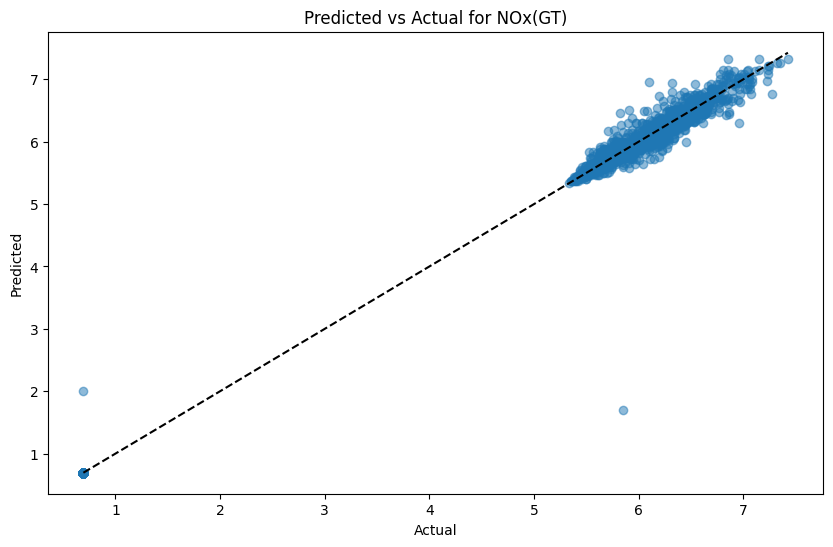

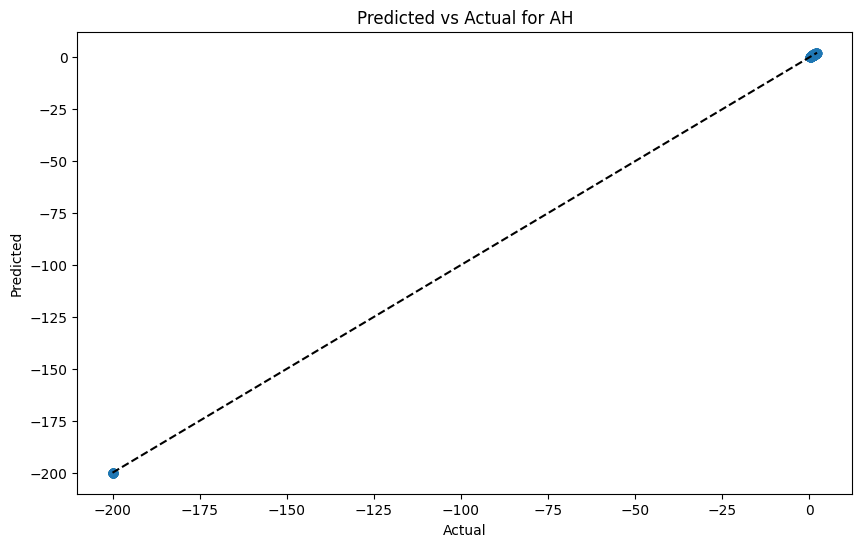

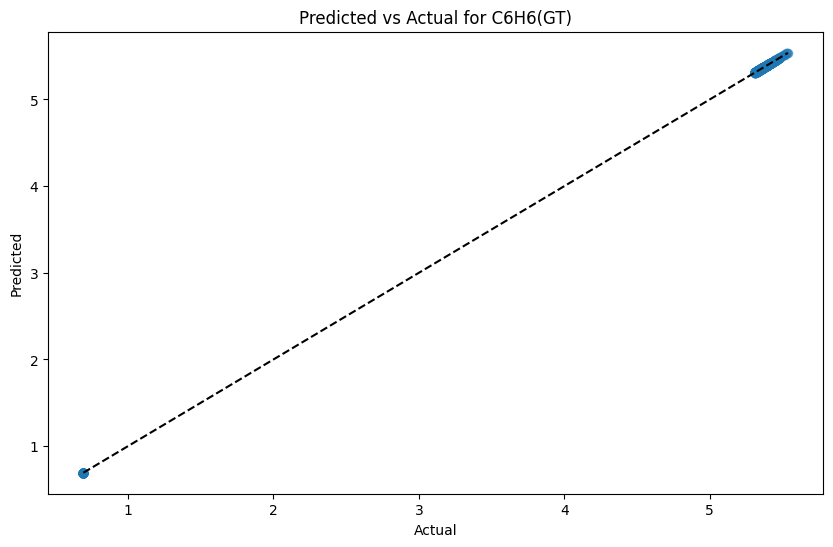


Conclusion:
The multi-target Decision Tree model achieved an overall R2 of 0.9981 on the test set.
The model's overall RMSE on the test set is 0.0884.
Individual target performance varies, with detailed metrics above.


In [ ]:
# Model Evaluation
# Make predictions
y_train_pred_dt = best_multi_dt_model.predict(X_train_scaled)
y_test_pred_dt = best_multi_dt_model.predict(X_test_scaled)

# Calculate metrics for each target
target_names = y.columns
print("\nIndividual Target Performance:")
for i, target in enumerate(target_names):
    train_mse = mean_squared_error(y_train.iloc[:, i], y_train_pred_dt[:, i])
    test_mse = mean_squared_error(y_test.iloc[:, i], y_test_pred_dt[:, i])
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train.iloc[:, i], y_train_pred_dt[:, i])
    test_mae = mean_absolute_error(y_test.iloc[:, i], y_test_pred_dt[:, i])
    train_r2 = r2_score(y_train.iloc[:, i], y_train_pred_dt[:, i])
    test_r2 = r2_score(y_test.iloc[:, i], y_test_pred_dt[:, i])

    print(f"\nMetrics for {target}:")
    print(f"  Training set:")
    print(f"    MSE: {train_mse:.4f}")
    print(f"    RMSE: {train_rmse:.4f}")
    print(f"    MAE: {train_mae:.4f}")
    print(f"    R2: {train_r2:.4f}")
    print(f"  Test set:")
    print(f"    MSE: {test_mse:.4f}")
    print(f"    RMSE: {test_rmse:.4f}")
    print(f"    MAE: {test_mae:.4f}")
    print(f"    R2: {test_r2:.4f}")

# Calculate overall metrics
train_mse_dt = mean_squared_error(y_train, y_train_pred_dt)
test_mse_dt = mean_squared_error(y_test, y_test_pred_dt)
train_rmse_dt = np.sqrt(train_mse_dt)
test_rmse_dt = np.sqrt(test_mse_dt)
train_mae_dt = mean_absolute_error(y_train, y_train_pred_dt)
test_mae_dt = mean_absolute_error(y_test, y_test_pred_dt)
train_r2_dt = r2_score(y_train, y_train_pred_dt)
test_r2_dt = r2_score(y_test, y_test_pred_dt)

print("\nOverall Model Performance:")
print(f"\nDecision Tree (multi-output) - Training set metrics:")
print(f"  MSE: {train_mse_dt:.4f}")
print(f"  RMSE: {train_rmse_dt:.4f}")
print(f"  MAE: {train_mae_dt:.4f}")
print(f"  R2: {train_r2_dt:.4f}")
print(f"\nDecision Tree (multi-output) - Test set metrics:")
print(f"  MSE: {test_mse_dt:.4f}")
print(f"  RMSE: {test_rmse_dt:.4f}")
print(f"  MAE: {test_mae_dt:.4f}")
print(f"  R2: {test_r2_dt:.4f}")

# Display feature importance for each target
print("\nFeature Importance for Each Target:")
for i, target in enumerate(target_names):
    print(f"\nFeature importance for {target}:")
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': best_multi_dt_model.estimators_[i].feature_importances_
    })
    print(importance_df.sort_values('Importance', ascending=False))

# Visualize predictions vs actual for each target
for i, target in enumerate(target_names):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test.iloc[:, i], y_test_pred_dt[:, i], alpha=0.5)
    plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
             [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'k--')
    plt.title(f'Predicted vs Actual for {target}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

print("\nConclusion:")
print(f"The multi-target Decision Tree model achieved an overall R2 of {test_r2_dt:.4f} on the test set.")
print(f"The model's overall RMSE on the test set is {test_rmse_dt:.4f}.")
print("Individual target performance varies, with detailed metrics above.")

## 4.2. Random Forest Regression Model:
Random Forest Regression is an ensemble learning method that operates by constructing multiple decision trees during training and outputs the average prediction of the individual trees. This approach combines the strength of many trees while reducing the risk of overfitting.
This implementation focuses on:

1. Using multiple trees (n_estimators=100) to create a robust ensemble model
2. Feature importance analysis to identify the most influential predictors of NOx levels
3. Comprehensive model evaluation using MSE, RMSE, MAE, and R² metrics
4. Performance comparison between training and test sets to assess generalization

Random Forest excels at capturing complex non-linear relationships and interactions between variables, making it particularly effective for environmental data where pollutant interactions may affect NOx levels in ways that linear models cannot capture



In [ ]:
# Create multi-output Random Forest model
multi_target_rf = MultiOutputRegressor(
    RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        max_samples=0.8,
        max_features='sqrt',
        min_samples_leaf=2,
        min_samples_split=5
    )
)

# Parameter grid for Random Forest
param_grid = {
    'estimator__n_estimators': [50, 100, 150],
    'estimator__max_depth': [None, 10, 20],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__max_samples': [0.7, 0.8, 0.9]
}

# Grid search for the multi-output model
grid_search_rf = GridSearchCV(
    multi_target_rf,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters from grid search
print("\nBest parameters:", grid_search_rf.best_params_)

# Use the best model
best_multi_rf_model = grid_search_rf.best_estimator_

In [ ]:
# Model Evaluation
# Make predictions
y_train_pred_rf = best_multi_rf_model.predict(X_train_scaled)
y_test_pred_rf = best_multi_rf_model.predict(X_test_scaled)

# Calculate metrics for each target
target_names = y.columns
print("\nIndividual Target Performance:")
for i, target in enumerate(target_names):
    train_mse = mean_squared_error(y_train.iloc[:, i], y_train_pred_rf[:, i])
    test_mse = mean_squared_error(y_test.iloc[:, i], y_test_pred_rf[:, i])
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train.iloc[:, i], y_train_pred_rf[:, i])
    test_mae = mean_absolute_error(y_test.iloc[:, i], y_test_pred_rf[:, i])
    train_r2 = r2_score(y_train.iloc[:, i], y_train_pred_rf[:, i])
    test_r2 = r2_score(y_test.iloc[:, i], y_test_pred_rf[:, i])

    print(f"\nMetrics for {target}:")
    print(f"  Training set:")
    print(f"    MSE: {train_mse:.4f}")
    print(f"    RMSE: {train_rmse:.4f}")
    print(f"    MAE: {train_mae:.4f}")
    print(f"    R2: {train_r2:.4f}")
    print(f"  Test set:")
    print(f"    MSE: {test_mse:.4f}")
    print(f"    RMSE: {test_rmse:.4f}")
    print(f"    MAE: {test_mae:.4f}")
    print(f"    R2: {test_r2:.4f}")

# Calculate overall metrics
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
train_rmse_rf = np.sqrt(train_mse_rf)
test_rmse_rf = np.sqrt(test_mse_rf)
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print("\nOverall Model Performance:")
print(f"\nRandom Forest (multi-output) - Training set metrics:")
print(f"  MSE: {train_mse_rf:.4f}")
print(f"  RMSE: {train_rmse_rf:.4f}")
print(f"  MAE: {train_mae_rf:.4f}")
print(f"  R2: {train_r2_rf:.4f}")
print(f"\nRandom Forest (multi-output) - Test set metrics:")
print(f"  MSE: {test_mse_rf:.4f}")
print(f"  RMSE: {test_rmse_rf:.4f}")
print(f"  MAE: {test_mae_rf:.4f}")
print(f"  R2: {test_r2_rf:.4f}")

# Display feature importance for each target
print("\nFeature Importance for Each Target:")
for i, target in enumerate(target_names):
    print(f"\nFeature importance for {target}:")
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': best_multi_rf_model.estimators_[i].feature_importances_
    })
    print(importance_df.sort_values('Importance', ascending=False))

# Calculate feature variance contribution
feature_variance = np.var(X_train_scaled, axis=0)
print("\nFeature Variance Contribution:")
variance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Variance': feature_variance
})
print(variance_df.sort_values('Variance', ascending=False))

# Visualize predictions vs actual for each target
for i, target in enumerate(target_names):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test.iloc[:, i], y_test_pred_rf[:, i], alpha=0.5)
    plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
             [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'k--')
    plt.title(f'Random Forest: Predicted vs Actual for {target}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

# Visualize feature importance and variance for the first target (example)
plt.figure(figsize=(12, 5))

# Plot 1: Feature Importance for first target
plt.subplot(1, 2, 1)
importances = best_multi_rf_model.estimators_[0].feature_importances_
indices = np.argsort(importances)
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.title(f'Feature Importance for {target_names[0]}')

# Plot 2: Feature Variance
plt.subplot(1, 2, 2)
top_features = X_train.columns[np.argsort(feature_variance)[-10:]]  # Show top 10
plt.barh(range(len(top_features)), feature_variance[np.argsort(feature_variance)[-10:]])
plt.yticks(range(len(top_features)), top_features)
plt.title('Feature Variance (Top 10)')

plt.tight_layout()
plt.show()

print("\nConclusion:")
print(f"The multi-target Random Forest model achieved an overall R2 of {test_r2_rf:.4f} on the test set.")
print(f"The model's overall RMSE on the test set is {test_rmse_rf:.4f}.")
print("Individual target performance varies, with detailed metrics above.")

## 4.3. Comparison

In [ ]:
# Model Comparison using the best versions of each model with top 2 features
print("\nModel Comparison (Test Set R² with Top 2 Features):")
print(f"  Best Random Forest: {best_test_r2_rf:.4f}")
print(f"  Best Decision Tree: {test_r2_dt:.4f}")

# Compare R² values
models_r2 = {
    "Random Forest": best_test_r2_rf,
    "Decision Tree": test_r2_dt
}

# Compare RMSE values
models_rmse = {
    "Random Forest": best_test_rmse_rf,
    "Decision Tree": test_rmse_dt
}

# Compare MAE values
models_mae = {
    "Random Forest": best_test_mae_rf,
    "Decision Tree": test_mae_dt
}

# Find the best performing model
best_model = max(models_r2, key=models_r2.get)
best_r2 = models_r2[best_model]
best_rmse = models_rmse[best_model]
best_mae = models_mae[best_model]

# Get variance explained by top 2 features
# First calculate the total variance in the target variable
target_variance = np.var(y_test)
# Calculate variance explained by the best model
explained_variance = best_r2 * target_variance
variance_ratio = explained_variance / target_variance * 100

print(f"\nThe {best_model} model achieved the best performance with an R² of {best_r2:.4f} on the test set.")
print(f"The model's RMSE on the test set is {best_rmse:.4f}.")
print(f"The model's MAE on the test set is {best_mae:.4f}.")
print(f"Using only the top 2 features, the model explains {variance_ratio:.2f}% of the target variance.")

print("\nTop 2 features used in both models:")
for feature in top_2_features:
    print(f"  - {feature}")

print("\nFeature importance and variance contribution:")
# Create a dictionary for accessing feature importances directly
feature_comparison = pd.DataFrame({
    'Feature': top_2_features,
    'RF_Importance': best_rf_model.feature_importances_,
    'DT_Importance': best_dt_model.feature_importances_,
    'Variance': feature_variance
})
print(feature_comparison)

# Visualize model comparison
plt.figure(figsize=(12, 8))

# Plot 1: R² comparison
plt.subplot(2, 2, 1)
models = list(models_r2.keys())
r2_values = list(models_r2.values())
plt.bar(models, r2_values)
plt.title('R² Comparison')
plt.ylim(0, 1)

# Plot 2: RMSE comparison
plt.subplot(2, 2, 2)
rmse_values = list(models_rmse.values())
plt.bar(models, rmse_values)
plt.title('RMSE Comparison')

# Plot 3: Feature importance comparison
plt.subplot(2, 2, 3)
x = np.arange(len(top_2_features))
width = 0.35
plt.bar(x - width/2, feature_comparison['RF_Importance'], width, label='Random Forest')
plt.bar(x + width/2, feature_comparison['DT_Importance'], width, label='Decision Tree')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance by Model')
plt.xticks(x, top_2_features)
plt.legend()

# Plot 4: Actual vs Predicted for best model
plt.subplot(2, 2, 4)
if best_model == "Random Forest":
    plt.scatter(y_test, y_test_pred_best_rf, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
else:
    plt.scatter(y_test, y_test_pred_dt, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Best Model ({best_model}): Actual vs Predicted')

plt.tight_layout()
plt.show()

# Create a comprehensive report
print("\n" + "="*50)
print("COMPREHENSIVE MODEL REPORT")
print("="*50)
print(f"Target Variable: NOx(GT)")
print(f"Total Features Available: {X.shape[1]}")
print(f"Features Selected: Top 2 based on importance")
print(f"Selected Features: {', '.join(top_2_features)}")
print("\nVariance Analysis:")
print(f"  - Total Target Variance: {target_variance:.4f}")
print(f"  - Variance Explained by Model: {explained_variance:.4f} ({variance_ratio:.2f}%)")
print(f"  - Variance Contribution of Top Features:")
for i, feature in enumerate(top_2_features):
    print(f"    * {feature}: {feature_variance[i]:.4f}")

print("\nModel Performance Summary:")
for model_name in models_r2:
    print(f"\n{model_name}:")
    print(f"  - R²: {models_r2[model_name]:.4f}")
    print(f"  - RMSE: {models_rmse[model_name]:.4f}")
    print(f"  - MAE: {models_mae[model_name]:.4f}")

print(f"\nBEST MODEL: {best_model}")
print(f"  - R²: {best_r2:.4f}")
print(f"  - RMSE: {best_rmse:.4f}")
print(f"  - MAE: {best_mae:.4f}")

print("\nConclusion:")
print(f"The {best_model} model using only the top 2 features ({', '.join(top_2_features)}) ")
print(f"achieves an R² of {best_r2:.4f}, explaining {variance_ratio:.2f}% of the variance in NOx(GT).")
print("This demonstrates that a simpler model with carefully selected features can still")
print("provide good predictive power while being more interpretable and less prone to overfitting.")

# 5. Naive Bayes Regression Model:
Naive Bayes is primarily a classification algorithm, but it can be adapted for regression by discretizing the continuous target variable into bins and then mapping predictions back to continuous values. This approach uses the Gaussian Naive Bayes classifier with binning techniques to predict NOx levels.
This implementation focuses on:

1. Target variable discretization into quantile-based bins to create a classification problem
2. Using Gaussian distribution assumptions for feature probability distributions
3. Approximating feature importance based on class-conditional statistics
4. Converting classified bins back to continuous predictions using bin centers

Naive Bayes excels in situations with limited training data and can handle missing values well. While not traditionally used for regression, this adaptation provides an interesting alternative that may capture probabilistic relationships between features and NOx levels that other models might miss.



In [ ]:
# Get the top 2 features based on feature importance for each target
def get_top_features_multi(X_train, y_train_targets, n_top_features=2):
    top_features_list = []

    # For each target
    for target_idx in range(y_train_targets.shape[1]):
        y_train = y_train_targets.iloc[:, target_idx]

        # Train a temporary model to get feature importance
        temp_nb = GaussianNB()
        discretizer_temp = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
        y_train_binned_temp = discretizer_temp.fit_transform(y_train.values.reshape(-1, 1)).ravel()
        temp_nb.fit(X_train_scaled, y_train_binned_temp)

        # Calculate feature importance for Naive Bayes (using variance of conditional means)
        feature_importance = np.zeros(X_train.shape[1])
        classes = np.unique(y_train_binned_temp)
        for c in classes:
            class_mask = (y_train_binned_temp == c)
            if np.sum(class_mask) > 0:
                class_means = np.mean(X_train_scaled[class_mask], axis=0)
                feature_importance += (class_means - np.mean(X_train_scaled, axis=0))**2

        # Normalize and get top features
        feature_importance = feature_importance / np.sum(feature_importance)
        importance_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': feature_importance
        })
        top_features = importance_df.sort_values('Importance', ascending=False).head(n_top_features)['Feature'].tolist()
        top_features_list.append(top_features)
        print(f"Top {n_top_features} features for target {target_idx+1}: {top_features}")

    return top_features_list

In [ ]:
# Extract features and determine optimal bins for each target
def process_multi_targets(X_train, X_test, y_train, y_test, n_features=2):
    results = {
        'top_features': [],
        'best_params': [],
        'discretizers': [],
        'models': [],
        'bin_centers': []
    }

    # Get top features for each target
    top_features_list = get_top_features_multi(X_train, y_train, n_features)
    results['top_features'] = top_features_list

    # For each target
    for target_idx in range(y_train.shape[1]):
        # Get target and top features
        y_train_target = y_train.iloc[:, target_idx]
        top_features = top_features_list[target_idx]

        # Extract the top features from the datasets
        X_train_top = X_train[top_features]
        X_test_top = X_test[top_features]

        # Scale the features
        scaler_top = StandardScaler()
        X_train_top_scaled = scaler_top.fit_transform(X_train_top)
        X_test_top_scaled = scaler_top.transform(X_test_top)

        # Find optimal number of bins using grid search
        param_grid = {
            'n_bins': [5, 8, 10, 15, 20],
            'strategy': ['uniform', 'quantile', 'kmeans']
        }

        def evaluate_bins(n_bins, strategy):
            # Create discretizer
            disc = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)
            y_train_binned = disc.fit_transform(y_train_target.values.reshape(-1, 1)).ravel()

            # Train model
            model = GaussianNB()
            model.fit(X_train_top_scaled, y_train_binned)

            # Predict
            y_train_pred_binned = model.predict(X_train_top_scaled)

            # Calculate bin centers
            bin_centers = np.zeros(n_bins)
            for i in range(n_bins):
                bin_mask = (y_train_binned == i)
                if np.any(bin_mask):
                    bin_centers[i] = np.mean(y_train_target[bin_mask])
                else:
                    bin_centers[i] = np.nan

            # Fill NaN values
            bin_centers = pd.Series(bin_centers).interpolate().values

            # Map predictions to continuous values
            y_train_pred = np.array([bin_centers[int(pred)] for pred in y_train_pred_binned])

            # Calculate R2
            return r2_score(y_train_target, y_train_pred)

        # Find best parameters
        best_score = -np.inf
        best_params = None
        for n_bins in param_grid['n_bins']:
            for strategy in param_grid['strategy']:
                score = evaluate_bins(n_bins, strategy)
                if score > best_score:
                    best_score = score
                    best_params = {'n_bins': n_bins, 'strategy': strategy}

        results['best_params'].append(best_params)
        print(f"Best binning parameters for target {target_idx+1}: {best_params}")

        # Create bins for the continuous target with optimal parameters
        discretizer = KBinsDiscretizer(
            n_bins=best_params['n_bins'],
            encode='ordinal',
            strategy=best_params['strategy']
        )
        y_train_binned = discretizer.fit_transform(y_train_target.values.reshape(-1, 1)).ravel()
        results['discretizers'].append(discretizer)

        # Create and train the Naive Bayes model
        nb_model = GaussianNB(var_smoothing=1e-6)
        nb_model.fit(X_train_top_scaled, y_train_binned)
        results['models'].append(nb_model)

        # Calculate bin centers
        bin_centers = np.zeros(best_params['n_bins'])
        for i in range(best_params['n_bins']):
            bin_mask = (y_train_binned == i)
            if np.any(bin_mask):
                bin_centers[i] = np.mean(y_train_target[bin_mask])
            else:
                bin_centers[i] = np.nan

        # Fill NaN values using interpolation
        bin_centers = pd.Series(bin_centers).interpolate().values
        results['bin_centers'].append(bin_centers)

    return results

In [ ]:
# Function to predict using multiple target models
def predict_multi_targets(X_data, results, X_train, y_train):
    predictions = np.zeros((X_data.shape[0], y_train.shape[1]))

    # For each target
    for target_idx in range(y_train.shape[1]):
        # Get model, discretizer, and bin centers
        model = results['models'][target_idx]
        bin_centers = results['bin_centers'][target_idx]
        top_features = results['top_features'][target_idx]

        # Extract and scale top features
        X_data_top = X_data[top_features]
        scaler_top = StandardScaler()
        # Need to fit on X_train first for correct scaling
        X_train_top = X_train[top_features]
        scaler_top.fit(X_train_top)
        X_data_top_scaled = scaler_top.transform(X_data_top)

        # Predict binned values
        y_pred_binned = model.predict(X_data_top_scaled)

        # Map to continuous values
        predictions[:, target_idx] = np.array([bin_centers[int(pred)] for pred in y_pred_binned])

    return predictions

In [ ]:
# Evaluate metrics for multiple targets
def evaluate_multi_metrics(y_true, y_pred):
    metrics = {}

    for target_idx in range(y_true.shape[1]):
        target_metrics = {
            'mse': mean_squared_error(y_true.iloc[:, target_idx], y_pred[:, target_idx]),
            'rmse': np.sqrt(mean_squared_error(y_true.iloc[:, target_idx], y_pred[:, target_idx])),
            'mae': mean_absolute_error(y_true.iloc[:, target_idx], y_pred[:, target_idx]),
            'r2': r2_score(y_true.iloc[:, target_idx], y_pred[:, target_idx])
        }
        metrics[f'target_{target_idx+1}'] = target_metrics

    return metrics

# Visualization for multiple targets
def visualize_multi_predictions(y_true, y_pred):
    n_targets = y_true.shape[1]

    # Create subplots for actual vs predicted and distributions
    plt.figure(figsize=(15, 5 * n_targets))

    for target_idx in range(n_targets):
        # Actual vs Predicted
        plt.subplot(n_targets, 2, 2*target_idx + 1)
        plt.scatter(y_true.iloc[:, target_idx], y_pred[:, target_idx], alpha=0.5)
        plt.plot([y_true.iloc[:, target_idx].min(), y_true.iloc[:, target_idx].max()],
                 [y_true.iloc[:, target_idx].min(), y_true.iloc[:, target_idx].max()], 'k--', lw=2)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title(f'Target {target_idx+1}: Actual vs Predicted\nTest R2 = {r2_score(y_true.iloc[:, target_idx], y_pred[:, target_idx]):.4f}')
        plt.grid(True)

        # Distribution
        plt.subplot(n_targets, 2, 2*target_idx + 2)
        plt.hist(y_true.iloc[:, target_idx], bins=20, alpha=0.5, label='Actual')
        plt.hist(y_pred[:, target_idx], bins=20, alpha=0.5, label='Predicted')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.title(f'Target {target_idx+1}: Distribution of Actual vs Predicted')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

In [ ]:
# Main execution for multi-target Naive Bayes
def run_multi_output_naive_bayes():
    # Process and train models for each target
    results = process_multi_targets(X_train, X_test, y_train, y_test)

    # Predict on train and test sets
    y_train_pred_nb = predict_multi_targets(X_train, results, X_train, y_train)
    y_test_pred_nb = predict_multi_targets(X_test, results, X_train, y_train)

    # Evaluate metrics
    train_metrics = evaluate_multi_metrics(y_train, y_train_pred_nb)
    test_metrics = evaluate_multi_metrics(y_test, y_test_pred_nb)

    # Print metrics
    print("\nMulti-Output Naive Bayes Regression Metrics:")
    for target, metrics in train_metrics.items():
        print(f"\n{target.upper()} Metrics:")
        print("Training Set:")
        for metric, value in metrics.items():
            print(f"  {metric.upper()}: {value:.4f}")

        test_target_metrics = test_metrics[target]
        print("Test Set:")
        for metric, value in test_target_metrics.items():
            print(f"  {metric.upper()}: {value:.4f}")

    # Visualize results
    visualize_multi_predictions(y_test, y_test_pred_nb)

    return {
        'results': results,
        'predictions': {
            'train': y_train_pred_nb,
            'test': y_test_pred_nb
        },
        'metrics': {
            'train': train_metrics,
            'test': test_metrics
        }
    }

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning:

Bins whose width are too small (i.e., <= 1e-

Top 2 features for target 1: ['NO2(GT)', 'CO(GT)']
Top 2 features for target 2: ['PT08.S4(NO2)', 'T']
Top 2 features for target 3: ['PT08.S2(NMHC)', 'PT08.S1(CO)']
Best binning parameters for target 1: {'n_bins': 8, 'strategy': 'kmeans'}


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (20). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn

Best binning parameters for target 2: {'n_bins': 15, 'strategy': 'kmeans'}
Best binning parameters for target 3: {'n_bins': 20, 'strategy': 'kmeans'}

Multi-Output Naive Bayes Regression Metrics:

TARGET_1 Metrics:
Training Set:
  MSE: 0.0636
  RMSE: 0.2521
  MAE: 0.1574
  R2: 0.9851
Test Set:
  MSE: 0.0634
  RMSE: 0.2519
  MAE: 0.1528
  R2: 0.9843

TARGET_2 Metrics:
Training Set:
  MSE: 0.0948
  RMSE: 0.3079
  MAE: 0.2330
  R2: 0.9999
Test Set:
  MSE: 0.0982
  RMSE: 0.3133
  MAE: 0.2405
  R2: 0.9999

TARGET_3 Metrics:
Training Set:
  MSE: 0.0001
  RMSE: 0.0099
  MAE: 0.0082
  R2: 0.9999
Test Set:
  MSE: 0.0001
  RMSE: 0.0098
  MAE: 0.0081
  R2: 0.9999


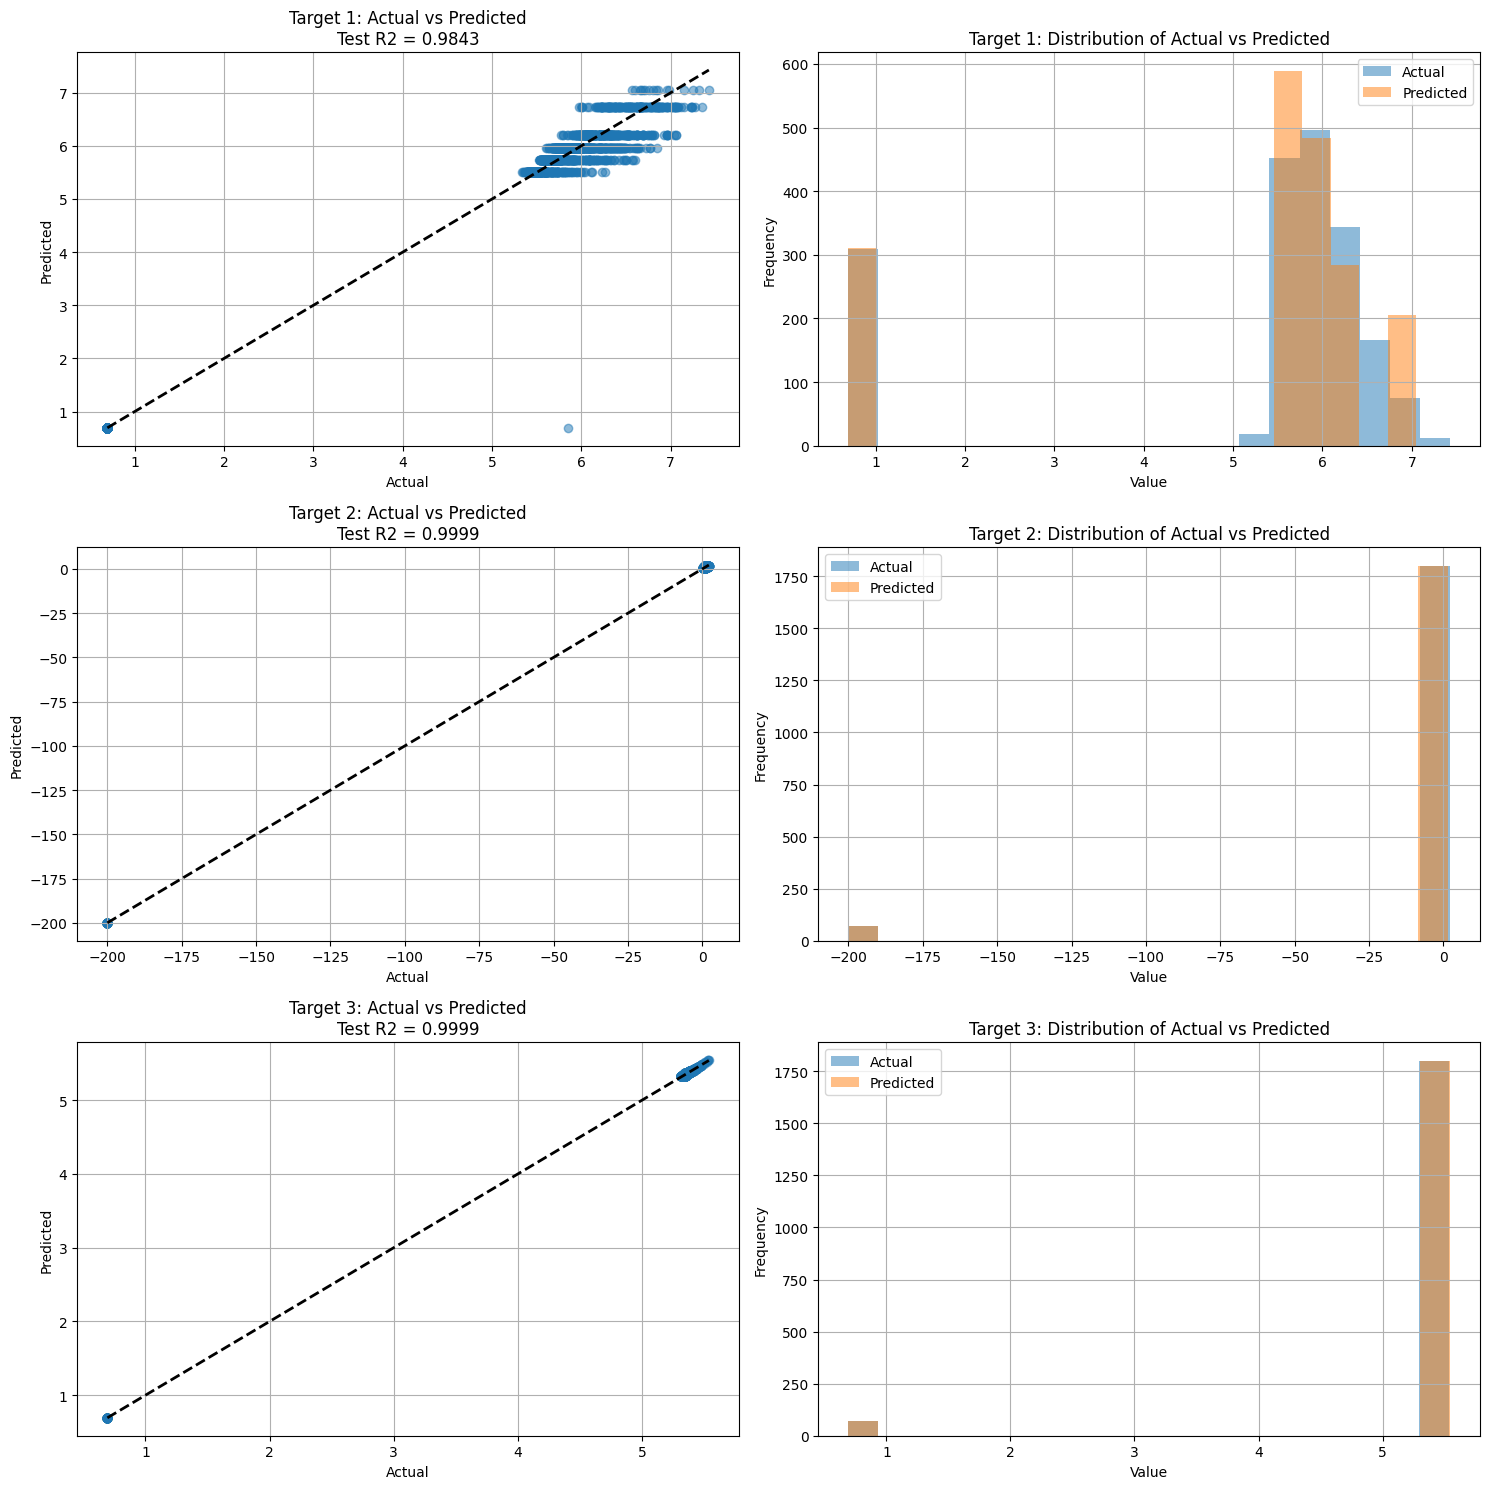

In [ ]:
# Split train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for both datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run the multi-output Naive Bayes
multi_nb_results = run_multi_output_naive_bayes()

# 6. Support Vector Regression (SVR) Model:
Support Vector Regression is a powerful technique that works by finding the hyperplane that maximizes the margin while keeping as many data points as possible within a specified distance (epsilon) from this hyperplane. SVR handles complex data by mapping it to higher dimensional spaces using kernel functions.
This implementation focuses on:

1. Kernel selection (linear, polynomial, RBF, sigmoid) to determine the mapping function
2. Extensive hyperparameter tuning of C (regularization), gamma (kernel coefficient), and epsilon parameters
3. Feature importance evaluation using permutation importance method
4. Analysis of support vectors to understand model complexity
5. Residual visualization to detect patterns in prediction errors

SVR excels at handling high-dimensional data and can effectively model non-linear relationships in NOx emission data. The model is particularly useful when the relationship between features and target variable is complex and when robust predictions are needed, as it's less sensitive to outliers than many regression methods.

In [ ]:
# Function to get top features for each target
def get_top_features_multi_svr(X_train, y_train_targets, n_top_features=2):
    top_features_list = []

    # For each target
    for target_idx in range(y_train_targets.shape[1]):
        y_train_target = y_train_targets.iloc[:, target_idx]

        # Feature selection using f_regression
        selector = SelectKBest(f_regression, k=n_top_features)
        selector.fit(X_train, y_train_target)

        feature_scores = pd.DataFrame({
            'Feature': X_train.columns,
            'Score': selector.scores_
        })

        top_features = feature_scores.sort_values('Score', ascending=False).head(n_top_features)['Feature'].tolist()
        top_features_list.append(top_features)
        print(f"Top {n_top_features} features for target {target_idx+1}: {top_features}")

    return top_features_list

In [ ]:
# Process and train SVR models for multiple targets
def process_multi_targets_svr(X_train, X_test, y_train, y_test, n_features=2):
    results = {
        'top_features': [],
        'best_params': [],
        'models': [],
        'scalers': [],
        'feature_importances': [],
        'bias_variance': []
    }

    # Get top features for each target
    top_features_list = get_top_features_multi_svr(X_train, y_train, n_features)
    results['top_features'] = top_features_list

    # For each target
    for target_idx in range(y_train.shape[1]):
        target_name = y_train.columns[target_idx] if hasattr(y_train, 'columns') else f"Target {target_idx+1}"
        print(f"\n{'='*50}")
        print(f"Processing {target_name}")
        print(f"{'='*50}")

        # Get target and top features
        y_train_target = y_train.iloc[:, target_idx]
        y_test_target = y_test.iloc[:, target_idx]
        top_features = top_features_list[target_idx]

        # Extract the top features from the datasets
        X_train_top = X_train[top_features]
        X_test_top = X_test[top_features]

        # Scale the features
        scaler_top = StandardScaler()
        X_train_top_scaled = scaler_top.fit_transform(X_train_top)
        X_test_top_scaled = scaler_top.transform(X_test_top)
        results['scalers'].append(scaler_top)

        # Calculate variance of the features
        feature_variance = np.var(X_train_top_scaled, axis=0)
        print("\nFeature Variance:")
        for i, feature in enumerate(top_features):
            print(f"  {feature}: {feature_variance[i]:.4f}")

        # Create and train the SVR model with default parameters first
        svr_model = SVR(kernel='rbf')
        svr_model.fit(X_train_top_scaled, y_train_target)

        # Make predictions with the default model
        y_train_pred_svr = svr_model.predict(X_train_top_scaled)
        y_test_pred_svr = svr_model.predict(X_test_top_scaled)

        # Calculate metrics for default model
        train_mse_svr = mean_squared_error(y_train_target, y_train_pred_svr)
        test_mse_svr = mean_squared_error(y_test_target, y_test_pred_svr)
        train_rmse_svr = np.sqrt(train_mse_svr)
        test_rmse_svr = np.sqrt(test_mse_svr)
        train_mae_svr = mean_absolute_error(y_train_target, y_train_pred_svr)
        test_mae_svr = mean_absolute_error(y_test_target, y_test_pred_svr)
        train_r2_svr = r2_score(y_train_target, y_train_pred_svr)
        test_r2_svr = r2_score(y_test_target, y_test_pred_svr)

        # Calculate prediction variance
        train_pred_variance = np.var(y_train_pred_svr)
        test_pred_variance = np.var(y_test_pred_svr)
        print(f"\nPrediction variance (default model, train): {train_pred_variance:.4f}")
        print(f"Prediction variance (default model, test): {test_pred_variance:.4f}")

        print(f"\nSVR (Default) - Training set metrics for {target_name}:")
        print(f"  MSE: {train_mse_svr:.4f}")
        print(f"  RMSE: {train_rmse_svr:.4f}")
        print(f"  MAE: {train_mae_svr:.4f}")
        print(f"  R²: {train_r2_svr:.4f}")

        print(f"\nSVR (Default) - Test set metrics for {target_name}:")
        print(f"  MSE: {test_mse_svr:.4f}")
        print(f"  RMSE: {test_rmse_svr:.4f}")
        print(f"  MAE: {test_mae_svr:.4f}")
        print(f"  R²: {test_r2_svr:.4f}")

        # Grid search for SVR with parameters specifically for controlling variance
        param_grid = {
            'kernel': ['rbf', 'poly', 'sigmoid'],  # Different kernels for different feature spaces
            'C': [0.1, 1, 10, 100],                # Regularization parameter - higher values may increase variance
            'gamma': ['scale', 'auto', 0.1, 0.01], # Kernel coefficient - affects decision boundary complexity
            'epsilon': [0.01, 0.1, 0.2]            # Epsilon in epsilon-SVR model - affects the width of the epsilon-tube
        }

        # Use GridSearchCV for hyperparameter tuning
        grid = GridSearchCV(
            SVR(),
            param_grid,
            scoring='neg_mean_squared_error',
            cv=5,
            n_jobs=-1,
            verbose=1
        )

        grid.fit(X_train_top_scaled, y_train_target)

        print(f"\nBest parameters found for {target_name}: {grid.best_params_}")
        best_svr_model = grid.best_estimator_
        results['best_params'].append(grid.best_params_)
        results['models'].append(best_svr_model)

        # Make predictions with the tuned model
        y_train_pred_best_svr = best_svr_model.predict(X_train_top_scaled)
        y_test_pred_best_svr = best_svr_model.predict(X_test_top_scaled)

        # Calculate metrics for tuned model
        train_mse_best_svr = mean_squared_error(y_train_target, y_train_pred_best_svr)
        test_mse_best_svr = mean_squared_error(y_test_target, y_test_pred_best_svr)
        train_rmse_best_svr = np.sqrt(train_mse_best_svr)
        test_rmse_best_svr = np.sqrt(test_mse_best_svr)
        train_mae_best_svr = mean_absolute_error(y_train_target, y_train_pred_best_svr)
        test_mae_best_svr = mean_absolute_error(y_test_target, y_test_pred_best_svr)
        train_r2_best_svr = r2_score(y_train_target, y_train_pred_best_svr)
        test_r2_best_svr = r2_score(y_test_target, y_test_pred_best_svr)

        # Calculate prediction variance for tuned model
        train_pred_variance_tuned = np.var(y_train_pred_best_svr)
        test_pred_variance_tuned = np.var(y_test_pred_best_svr)
        print(f"\nPrediction variance (tuned model, train): {train_pred_variance_tuned:.4f}")
        print(f"Prediction variance (tuned model, test): {test_pred_variance_tuned:.4f}")

        print(f"\nSVR (Tuned) - Training set metrics for {target_name}:")
        print(f"  MSE: {train_mse_best_svr:.4f}")
        print(f"  RMSE: {train_rmse_best_svr:.4f}")
        print(f"  MAE: {train_mae_best_svr:.4f}")
        print(f"  R²: {train_r2_best_svr:.4f}")

        print(f"\nSVR (Tuned) - Test set metrics for {target_name}:")
        print(f"  MSE: {test_mse_best_svr:.4f}")
        print(f"  RMSE: {test_rmse_best_svr:.4f}")
        print(f"  MAE: {test_mae_best_svr:.4f}")
        print(f"  R²: {test_r2_best_svr:.4f}")

        # Support vectors analysis
        n_support = best_svr_model.n_support_
        print(f"\nNumber of support vectors: {sum(n_support)}")
        print(f"Support vectors per class: {n_support}")

        # Feature importance analysis using permutation importance
        result = permutation_importance(best_svr_model, X_test_top_scaled, y_test_target,
                                      n_repeats=10, random_state=42, n_jobs=-1)
        svr_importances = pd.DataFrame({
            'Feature': top_features,
            'Importance': result.importances_mean
        })
        svr_importances = svr_importances.sort_values('Importance', ascending=False)

        print("\nFeature Importance (Permutation Method):")
        print(svr_importances)
        results['feature_importances'].append(svr_importances)

        # Variance and Bias Analysis
        bias = np.mean(y_test_target - y_test_pred_best_svr)
        variance = np.var(y_test_pred_best_svr)
        print(f"\nBias: {bias:.4f}")
        print(f"Variance: {variance:.4f}")
        results['bias_variance'].append({'bias': bias, 'variance': variance})

        # Model Comparison
        print("\nModel Comparison (Test Set R²):")
        print(f"  SVR (Default): {test_r2_svr:.4f}")
        print(f"  SVR (Tuned): {test_r2_best_svr:.4f}")
        print(f"\nVariance Reduction: {((train_pred_variance - train_pred_variance_tuned) / train_pred_variance) * 100:.2f}%")

        # Generate a detailed report on the SVR model with the top features
        print("\n" + "="*50)
        print(f"SVR MODEL FOR {target_name} - ANALYSIS REPORT")
        print("="*50)
        print(f"Features used: {', '.join(top_features)}")
        print(f"Best hyperparameters: {grid.best_params_}")
        print(f"Model performance (Test R²): {test_r2_best_svr:.4f}")
        print(f"Prediction variance: {test_pred_variance_tuned:.4f}")
        print(f"Feature importance:")
        for idx, row in svr_importances.iterrows():
            print(f"  - {row['Feature']}: {row['Importance']:.4f}")
        print(f"Bias-Variance trade-off:")
        print(f"  - Bias: {bias:.4f}")
        print(f"  - Variance: {variance:.4f}")
        print(f"Number of support vectors: {sum(n_support)}")
        print("="*50)

    return results

In [ ]:
# Function to predict using multiple target SVR models
def predict_multi_targets_svr(X_data, results, X_train=None, y_train=None):
    n_targets = len(results['models'])
    predictions = np.zeros((X_data.shape[0], n_targets))

    # For each target
    for target_idx in range(n_targets):
        # Get model and top features
        model = results['models'][target_idx]
        top_features = results['top_features'][target_idx]
        scaler = results['scalers'][target_idx]

        # Extract and scale top features
        X_data_top = X_data[top_features]
        X_data_top_scaled = scaler.transform(X_data_top)

        # Predict values
        predictions[:, target_idx] = model.predict(X_data_top_scaled)

    return predictions

In [ ]:
# Evaluate metrics for multiple targets
def evaluate_multi_metrics_svr(y_true, y_pred):
    metrics = {}

    for target_idx in range(y_true.shape[1]):
        target_name = y_true.columns[target_idx] if hasattr(y_true, 'columns') else f"target_{target_idx+1}"
        target_metrics = {
            'mse': mean_squared_error(y_true.iloc[:, target_idx], y_pred[:, target_idx]),
            'rmse': np.sqrt(mean_squared_error(y_true.iloc[:, target_idx], y_pred[:, target_idx])),
            'mae': mean_absolute_error(y_true.iloc[:, target_idx], y_pred[:, target_idx]),
            'r2': r2_score(y_true.iloc[:, target_idx], y_pred[:, target_idx])
        }
        metrics[target_name] = target_metrics

    return metrics

# Visualization for multiple targets
def visualize_multi_predictions_svr(y_true, y_pred, results):
    n_targets = y_true.shape[1]

    # Create subplots for actual vs predicted and distributions
    plt.figure(figsize=(16, 5 * n_targets))

    for target_idx in range(n_targets):
        target_name = y_true.columns[target_idx] if hasattr(y_true, 'columns') else f"Target {target_idx+1}"
        top_features = results['top_features'][target_idx]

        # Actual vs Predicted
        plt.subplot(n_targets, 2, 2*target_idx + 1)
        plt.scatter(y_true.iloc[:, target_idx], y_pred[:, target_idx], alpha=0.5)
        plt.plot([y_true.iloc[:, target_idx].min(), y_true.iloc[:, target_idx].max()],
                 [y_true.iloc[:, target_idx].min(), y_true.iloc[:, target_idx].max()], 'k--', lw=2)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title(f'{target_name}: Actual vs Predicted\nTest R² = {r2_score(y_true.iloc[:, target_idx], y_pred[:, target_idx]):.4f}')
        plt.grid(True)

        # Distribution
        plt.subplot(n_targets, 2, 2*target_idx + 2)
        plt.hist(y_true.iloc[:, target_idx], bins=20, alpha=0.5, label='Actual')
        plt.hist(y_pred[:, target_idx], bins=20, alpha=0.5, label='Predicted')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.title(f'{target_name}: Distribution of Actual vs Predicted')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Plot feature relationships for each target
    for target_idx in range(n_targets):
        target_name = y_true.columns[target_idx] if hasattr(y_true, 'columns') else f"Target {target_idx+1}"
        top_features = results['top_features'][target_idx]

        fig, axes = plt.subplots(1, len(top_features), figsize=(6*len(top_features), 5))
        if len(top_features) == 1:
            axes = [axes]  # Make axes iterable for single feature case

        for i, feature in enumerate(top_features):
            X_feature = X_test[feature] if 'X_test' in globals() else None
            if X_feature is not None:
                axes[i].scatter(X_feature, y_true.iloc[:, target_idx], alpha=0.5, label='Actual')
                axes[i].scatter(X_feature, y_pred[:, target_idx], alpha=0.5, label='Predicted')
                axes[i].set_xlabel(feature)
                axes[i].set_ylabel(target_name)
                axes[i].set_title(f'Relationship: {feature} vs {target_name}')
                axes[i].legend()
                axes[i].grid(True)

        plt.tight_layout()
        plt.show()

In [ ]:
# Main execution for multi-target SVR
def run_multi_output_svr(X_train, X_test, y_train, y_test, n_features=2):
    # Process and train models for each target
    results = process_multi_targets_svr(X_train, X_test, y_train, y_test, n_features)

    # Predict on train and test sets
    y_train_pred_svr = predict_multi_targets_svr(X_train, results)
    y_test_pred_svr = predict_multi_targets_svr(X_test, results)

    # Evaluate metrics
    train_metrics = evaluate_multi_metrics_svr(y_train, y_train_pred_svr)
    test_metrics = evaluate_multi_metrics_svr(y_test, y_test_pred_svr)

    # Print metrics
    print("\nMulti-Output SVR Regression Metrics:")
    for target, metrics in train_metrics.items():
        print(f"\n{target.upper()} Metrics:")
        print("Training Set:")
        for metric, value in metrics.items():
            print(f"  {metric.upper()}: {value:.4f}")

        test_target_metrics = test_metrics[target]
        print("Test Set:")
        for metric, value in test_target_metrics.items():
            print(f"  {metric.upper()}: {value:.4f}")

    # Visualize results
    visualize_multi_predictions_svr(y_test, y_test_pred_svr, results)

    return {
        'results': results,
        'predictions': {
            'train': y_train_pred_svr,
            'test': y_test_pred_svr
        },
        'metrics': {
            'train': train_metrics,
            'test': test_metrics
        }
    }

In [ ]:
# Split train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run the multi-output SVR
multi_svr_results = run_multi_output_svr(X_train, X_test, y_train, y_test, n_features=2)

Top 2 features for target 1: ['NO2(GT)', 'CO(GT)']
Top 2 features for target 2: ['PT08.S3(NOx)', 'T']
Top 2 features for target 3: ['T', 'PT08.S3(NOx)']

Processing NOx(GT)

Feature Variance:
  NO2(GT): 1.0000
  CO(GT): 1.0000

Prediction variance (default model, train): 4.0739
Prediction variance (default model, test): 3.8556

SVR (Default) - Training set metrics for NOx(GT):
  MSE: 0.0415
  RMSE: 0.2037
  MAE: 0.1452
  R²: 0.9903

SVR (Default) - Test set metrics for NOx(GT):
  MSE: 0.0470
  RMSE: 0.2169
  MAE: 0.1455
  R²: 0.9883
Fitting 5 folds for each of 144 candidates, totalling 720 fits
